In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_theme(font_scale = 2)

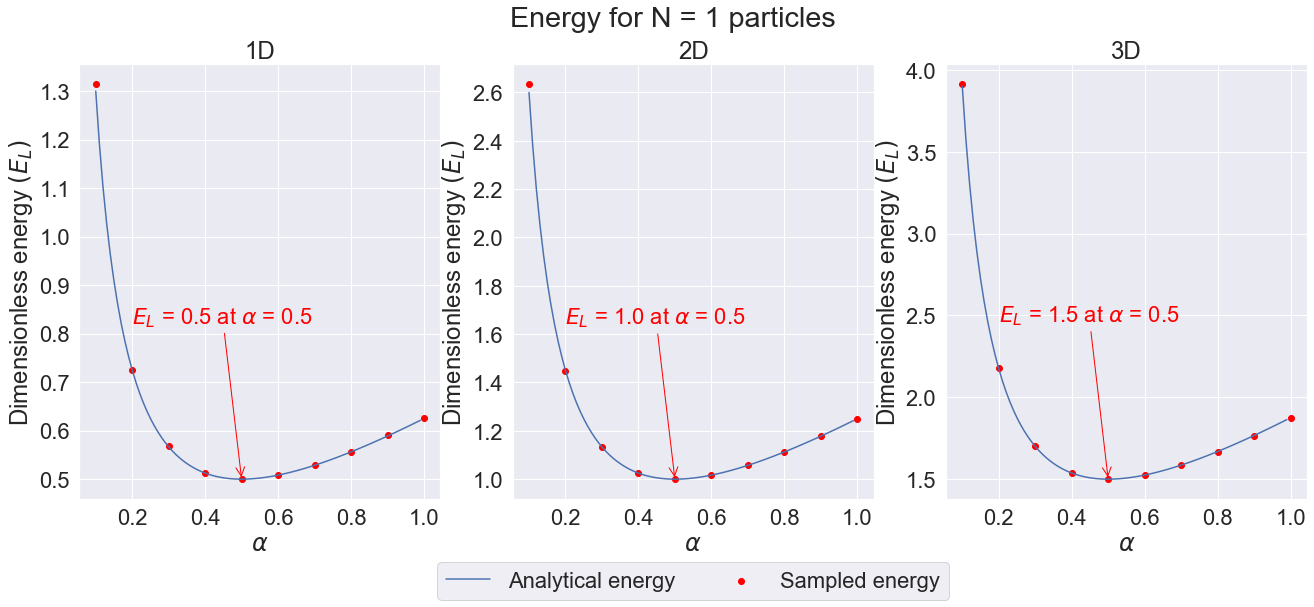

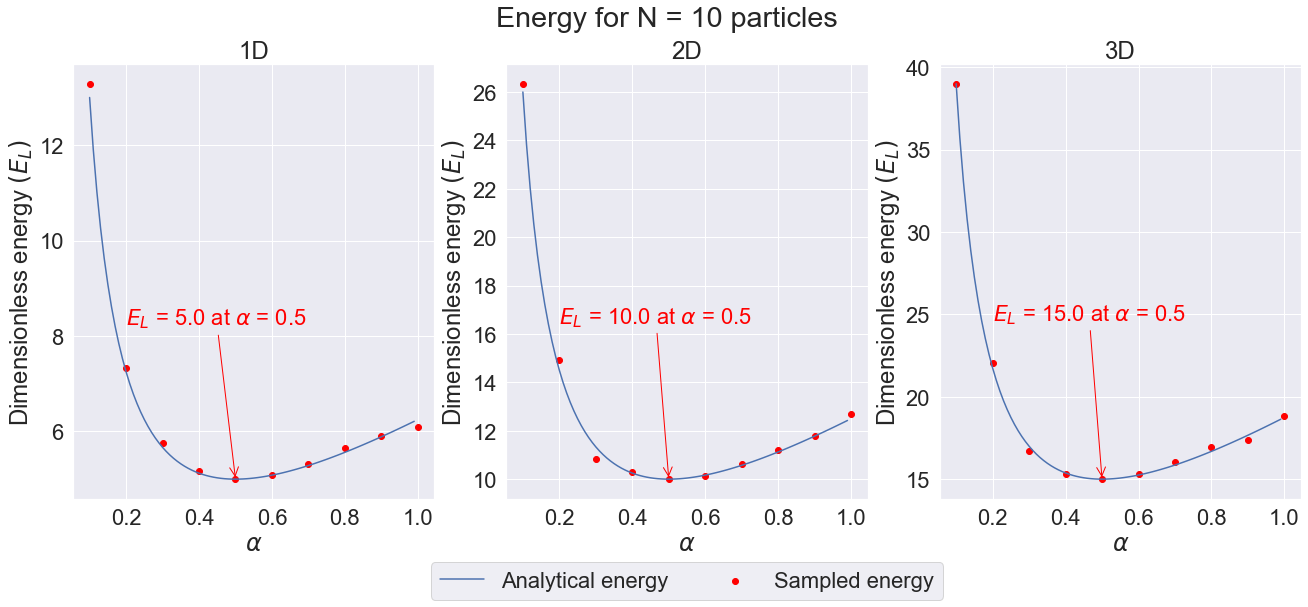

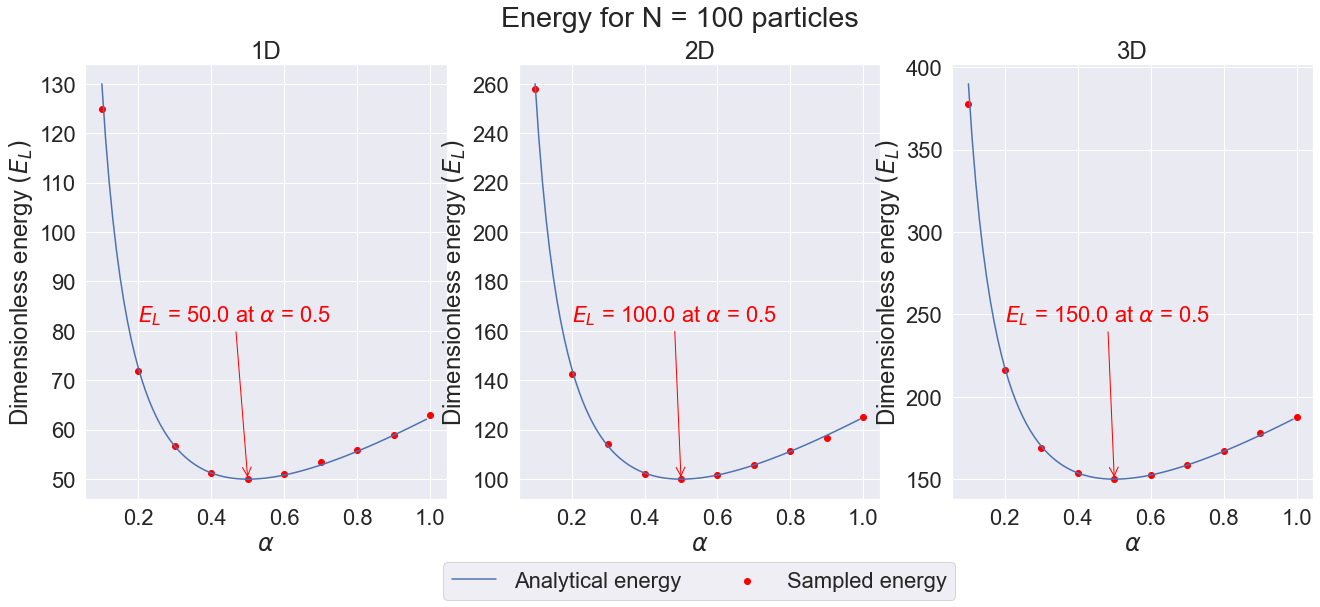

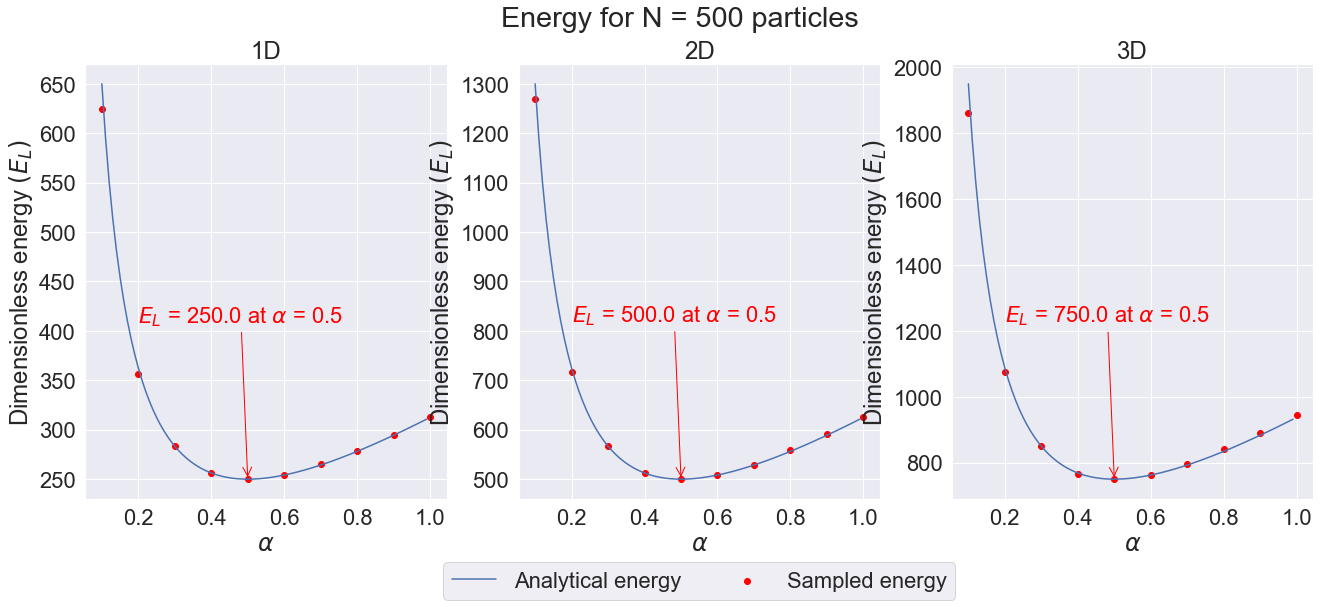

In [2]:
def analytical_energy(alpha, N_dim, N_particles):
    y = alpha/2 + 1/(8*alpha)
    return y*N_dim*N_particles
alpha = np.arange(0.1, 1, 0.01)
arrowprops = dict(arrowstyle="->", color = 'red')
for N in [1, 10, 100, 500]:
    fig, axs = plt.subplots(1, 3, figsize = (22, 8))
    for index, d in enumerate([1, 2, 3]):
        df = pd.read_csv(f'../output/N={N}_d={d}_ana_IS.csv')
        N_dim = df.d.iloc[0]
        N_particles = df.N.iloc[0]

        min_energy = df['energy'].min()
        min_alpha = df[df.energy == min_energy]['alpha'].iloc[0]
        
        axs[index].plot(alpha, analytical_energy(alpha, N_dim, N_particles), label = 'Analytical energy')
        axs[index].scatter(x = df['alpha'],y =  df['energy'], label = 'Sampled energy', color = 'red')
        axs[index].set_xlabel(r'$\alpha$')
        axs[index].set_ylabel(r'Dimensionless energy $(E_L)$')
        axs[index].annotate(r'$E_L$'+ f' = {min_energy} at '+r'$\alpha$'+f' = {min_alpha}',
                            xy=(min_alpha, min_energy), 
                            xytext=(min_alpha-0.3, min_energy+0.5*df.energy.mean()),
                            arrowprops=arrowprops, size = 22, color = 'red')
        axs[index].set_title(f'{d}D')
    tlt = fig.suptitle(f'Energy for N = {N_particles} particles')
    lgd = axs[1].legend(loc = 'upper center', ncol = 2, fancybox = True, bbox_to_anchor = (0.5, -0.12))
    #plt.savefig(f'N={N}_energy.pdf', bbox_extra_artists=(lgd,tlt), bbox_inches='tight')
    plt.show()

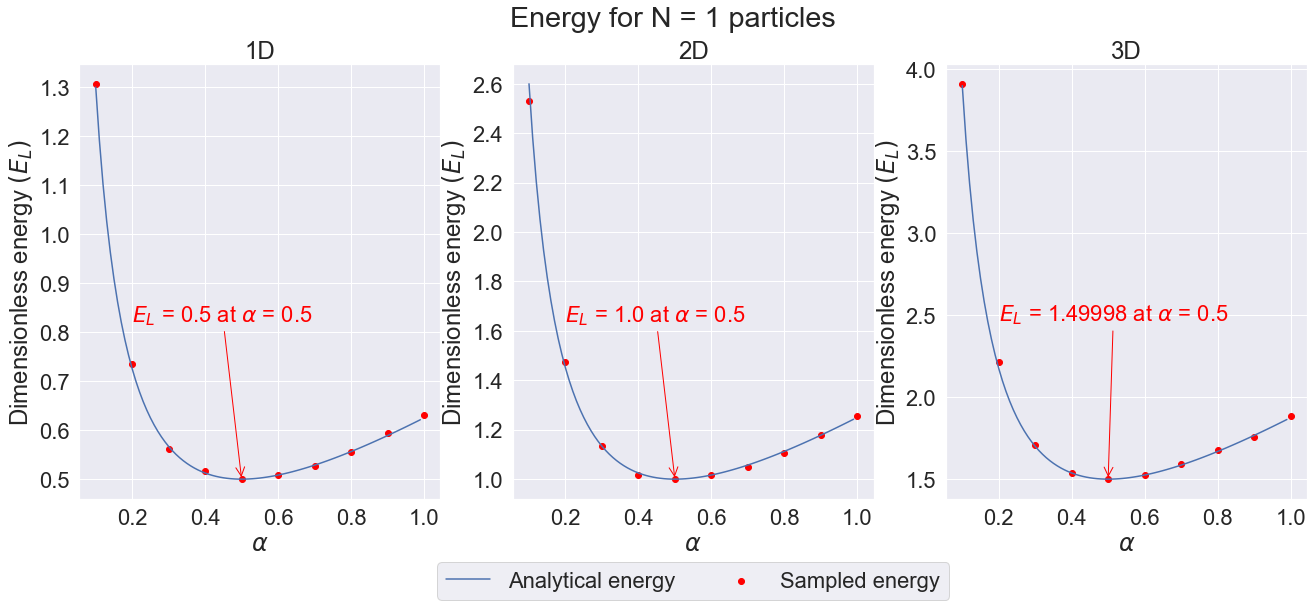

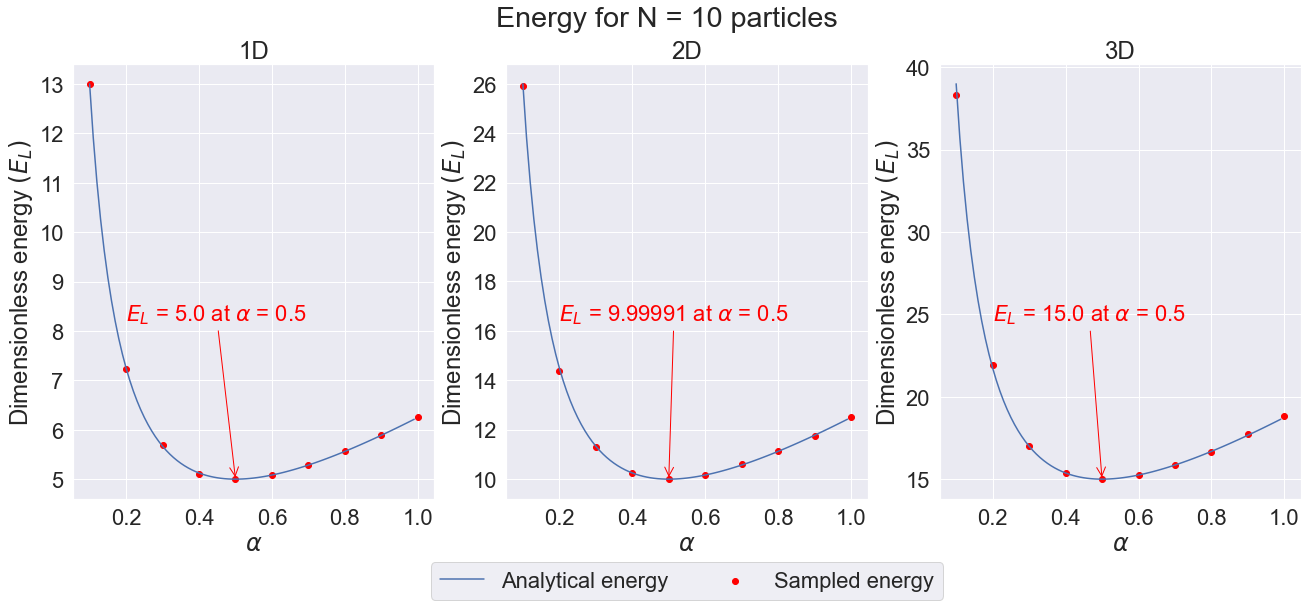

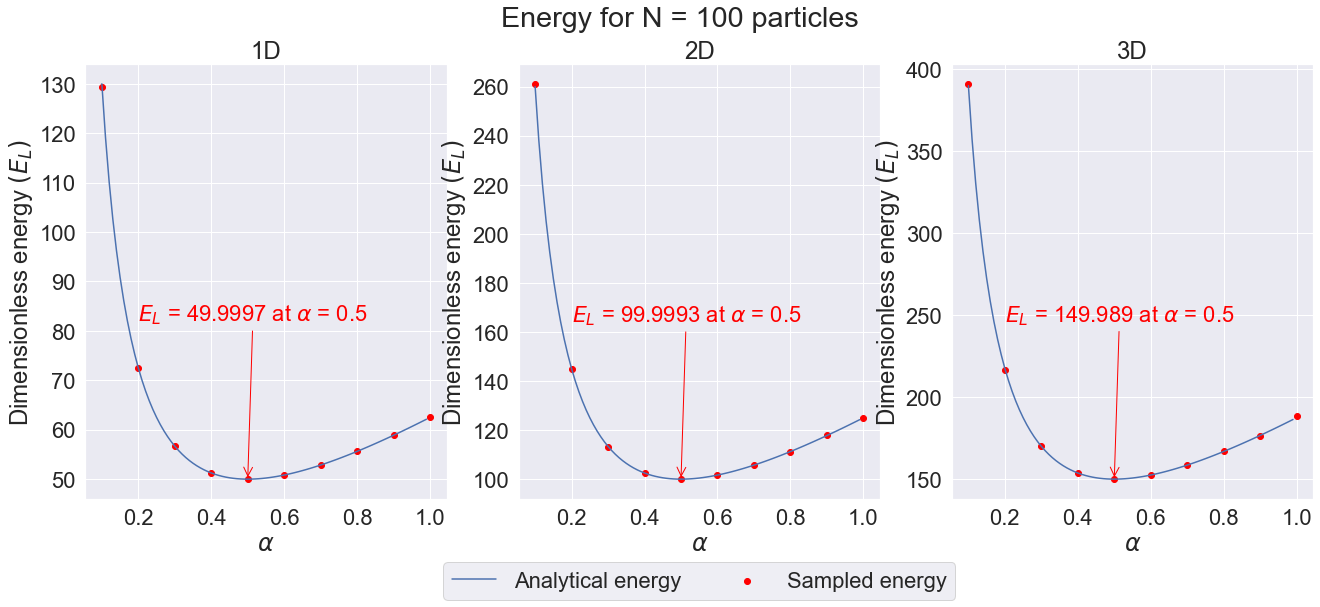

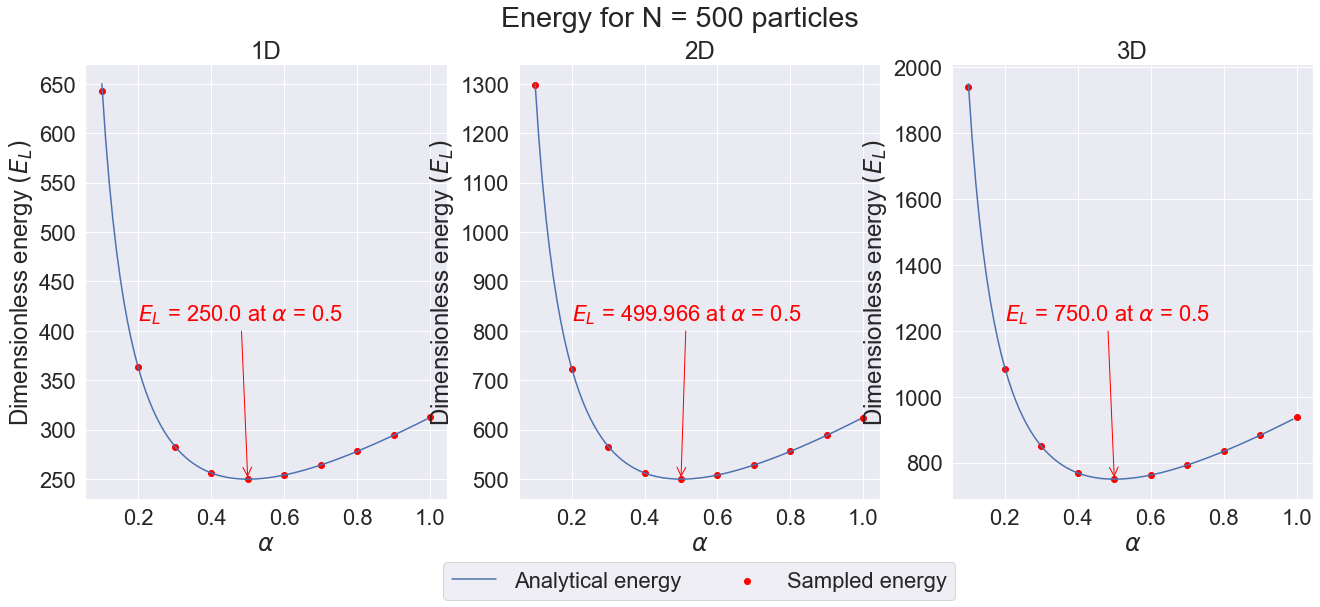

In [3]:
def analytical_energy(alpha, N_dim, N_particles):
    y = alpha/2 + 1/(8*alpha)
    return y*N_dim*N_particles
alpha = np.arange(0.1, 1, 0.01)
arrowprops = dict(arrowstyle="->", color = 'red')
for N in [1, 10, 100, 500]:
    fig, axs = plt.subplots(1, 3, figsize = (22, 8))
    for index, d in enumerate([1, 2, 3]):
        df = pd.read_csv(f'../output/N={N}_d={d}_num.csv')
        N_dim = df.d.iloc[0]
        N_particles = df.N.iloc[0]

        min_energy = df['energy'].min()
        min_alpha = df[df.energy == min_energy]['alpha'].iloc[0]
        
        axs[index].plot(alpha, analytical_energy(alpha, N_dim, N_particles), label = 'Analytical energy')
        axs[index].scatter(x = df['alpha'],y =  df['energy'], label = 'Sampled energy', color = 'red')
        axs[index].set_xlabel(r'$\alpha$')
        axs[index].set_ylabel(r'Dimensionless energy $(E_L)$')
        axs[index].annotate(r'$E_L$'+ f' = {min_energy} at '+r'$\alpha$'+f' = {min_alpha}',
                            xy=(min_alpha, min_energy), 
                            xytext=(min_alpha-0.3, min_energy+0.5*df.energy.mean()),
                            arrowprops=arrowprops, size = 22, color = 'red')
        axs[index].set_title(f'{d}D')
    tlt = fig.suptitle(f'Energy for N = {N_particles} particles')
    lgd = axs[1].legend(loc = 'upper center', ncol = 2, fancybox = True, bbox_to_anchor = (0.5, -0.12))
    #plt.savefig(f'N={N}_energy.pdf', bbox_extra_artists=(lgd,tlt), bbox_inches='tight')
    plt.show()

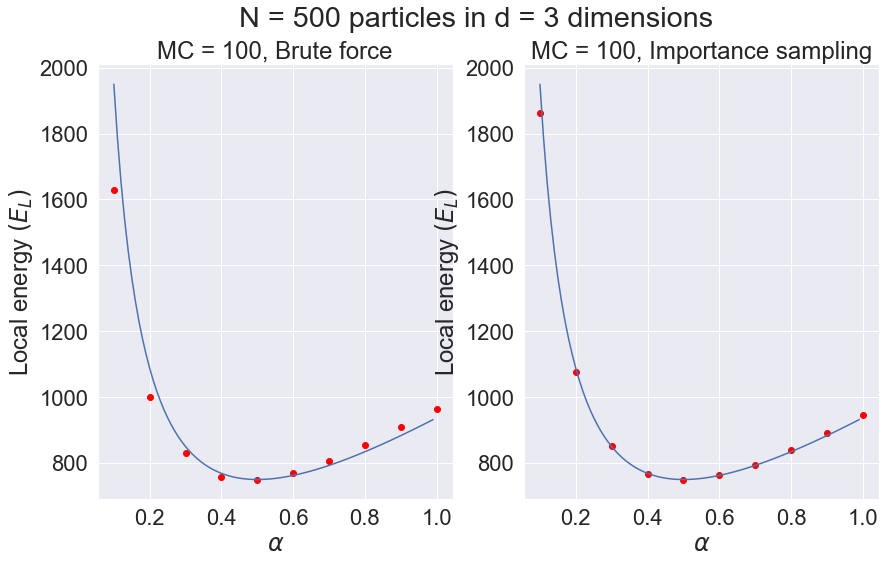

In [4]:
N = 500
d = 3
fig, axs = plt.subplots(1, 2, figsize = (14, 8))
titlename = ['Brute force', 'Importance sampling']
for index, name in enumerate([f'../output/N={N}_d={d}_ana.csv', f'../output/N={N}_d={d}_ana_IS.csv']):
    df = pd.read_csv(name)
    N_dim = df.d.iloc[0]
    N_particles = df.N.iloc[0]
    MC_cyles = df.MC.iloc[0]

    min_energy = df['energy'].min()
    min_alpha = df[df.energy == min_energy]['alpha'].iloc[0]

    axs[index].plot(alpha, analytical_energy(alpha, N_dim, N_particles), label = 'Analytical energy')
    axs[index].scatter(x = df['alpha'],y =  df['energy'], label = 'Sampled energy', color = 'red')
    axs[index].set_xlabel(r'$\alpha$')
    """axs[index].annotate(r'$E_L$'+ f' = {min_energy} at '+r'$\alpha$'+f' = {min_alpha}',
                        xy=(min_alpha, min_energy), 
                        xytext=(min_alpha-0.3, min_energy+0.5*df.energy.mean()),
                        arrowprops=arrowprops, size = 16, color = 'red')
    """
    axs[index].set_title(f'MC = {MC_cyles}, {titlename[index]}')
    fig.suptitle(f'N = {N_particles} particles in d = {d} dimensions')
    axs[index].set_ylabel(r'Local energy $(E_L)$')
#lgd = axs[0].legend(loc = 'upper center', ncol = 2, fancybox = True, bbox_to_anchor = (0.5, -0.12))
#fig.tight_layout()
plt.show()

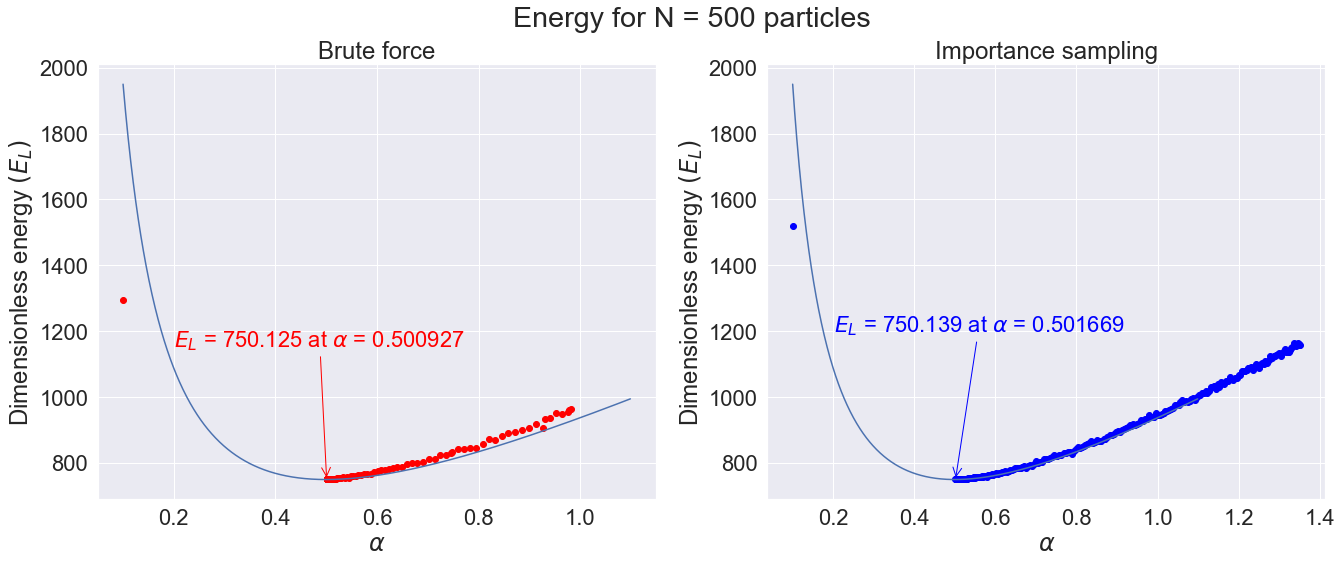

In [5]:
N = 500
d = 3
df_is = pd.read_csv(f'../output/N={N}_d={d}_GD_IS_energy.csv')
df = pd.read_csv(f'../output/N={N}_d={d}_GD_energy.csv')

fig, axs = plt.subplots(1, 2, figsize = (22, 8))
N_dim = df.d.iloc[0]
N_particles = df.N.iloc[0]


N_dim = df.d.iloc[0]
N_particles = df.N.iloc[0]

min_energy = df['energy'].iloc[-1]
min_alpha = df[df.energy == min_energy]['alpha'].iloc[0]

min_energy_is = df_is['energy'].iloc[-1]
min_alpha_is = df_is[df_is.energy == min_energy_is]['alpha'].iloc[0]

arrowprops = dict(arrowstyle="->", color = 'red')
arrowprops_is = dict(arrowstyle="->", color = 'blue')

alpha_plot = np.arange(0.1, 1.1, 0.001)
#axs.plot(alpha, analytical_energy(alpha, N_dim, N_particles), label = 'Analytical energy')
axs[0].scatter(df['alpha'], df['energy'], label = 'Brute force', color = 'red')
axs[1].scatter(df_is['alpha'], df_is['energy'], label = 'Importance sampling', color = 'blue')
axs[0].set_xlabel(r'$\alpha$')
axs[0].set_ylabel(r'Dimensionless energy $(E_L)$')
axs[1].set_xlabel(r'$\alpha$')
axs[1].set_ylabel(r'Dimensionless energy $(E_L)$')
axs[0].plot(alpha_plot, analytical_energy(alpha_plot, N_dim, N_particles), label = 'Analytical energy')
axs[1].plot(alpha_plot, analytical_energy(alpha_plot, N_dim, N_particles), label = 'Analytical energy')
axs[0].annotate(r'$E_L$'+ f' = {min_energy} at '+r'$\alpha$'+f' = {min_alpha}',
                    xy=(min_alpha, min_energy), 
                    xytext=(min_alpha-0.3, min_energy+0.5*df.energy.mean()),
                    arrowprops=arrowprops, size = 22, color = 'red')
axs[1].annotate(r'$E_L$'+ f' = {min_energy_is} at '+r'$\alpha$'+f' = {min_alpha_is}',
                    xy=(min_alpha_is, min_energy_is), 
                    xytext=(min_alpha_is-0.3, min_energy_is+0.5*df_is.energy.mean()),
                    arrowprops=arrowprops_is, size = 22, color = 'blue')

axs[0].set_title(f'Brute force')
axs[1].set_title(f'Importance sampling')
tlt = fig.suptitle(f'Energy for N = {N_particles} particles')
#lgd = axs.legend(loc = 'upper center', ncol = 2, fancybox = True, bbox_to_anchor = (0.5, -0.12))
#plt.savefig(f'N={N}_energy.pdf', bbox_extra_artists=(lgd,tlt), bbox_inches='tight')
plt.show()

In [6]:
df = pd.read_csv(f'../output/N=10_d=3_int_IS.csv')
df['sigma'] = np.sqrt(df['variance'])
display(df)

,MC,N,d,alpha,energy,variance,sigma


,MC,N,d,alpha,energy,variance,sigma
0,1000000,10,3,0.1,63.0820,295.9100,17.202035
1,1000000,10,3,0.2,35.2619,57.1706,7.561124
2,1000000,10,3,0.3,27.6232,58.6919,7.661064
3,1000000,10,3,0.4,25.0682,582.7590,24.140402
4,1000000,10,3,0.5,24.6172,6266.6700,79.162302
5,1000000,10,3,0.6,24.9461,97.5958,9.879059
6,1000000,10,3,0.7,26.5856,87858.4000,296.409177
7,1000000,10,3,0.8,27.5711,9230.3300,96.074606
8,1000000,10,3,0.9,29.3055,20926.9000,144.661329
9,1000000,10,3,1.0,31.0193,1774.8500,42.128969


[]

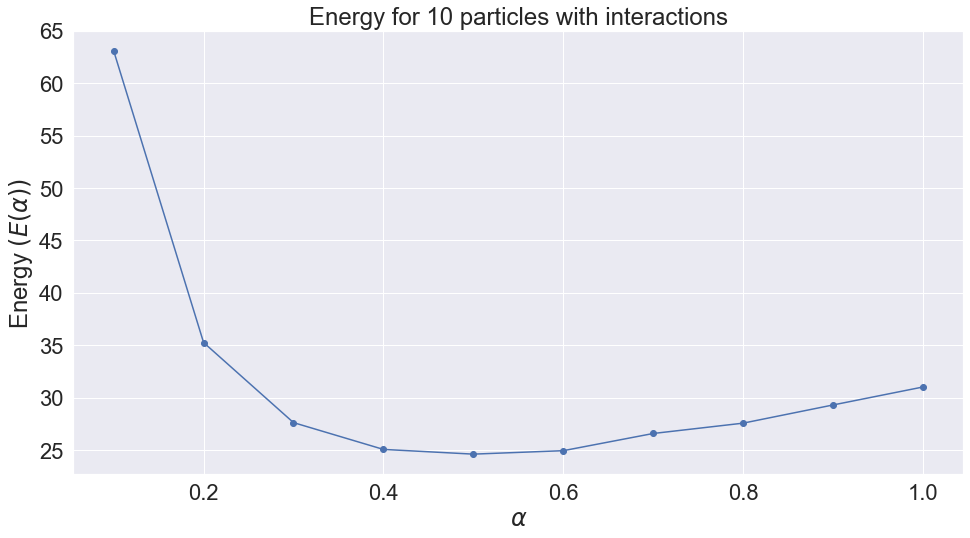

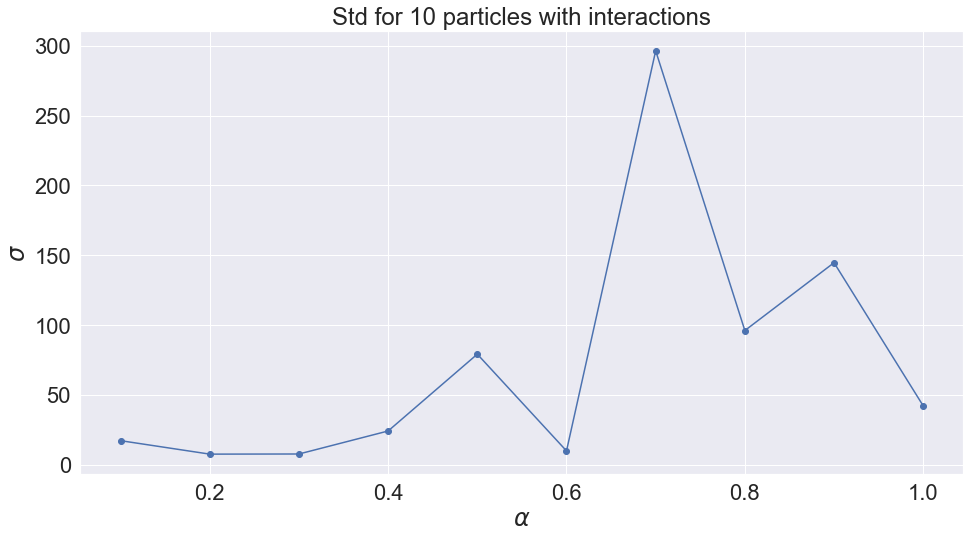

In [7]:
df = pd.read_csv(f'../output/N=10_d=3_int.csv')
df['sigma'] = np.sqrt(df['variance'])
display(df)
fig, axs = plt.subplots(1, 1, figsize = (14, 8))
axs.scatter(df.alpha, df.energy)
axs.plot(df.alpha, df.energy)
axs.set_xlabel(r'$\alpha$')
axs.set_ylabel(r'Energy $(E(\alpha))$')
axs.set_title(f'Energy for 10 particles with interactions')
fig.tight_layout()
plt.plot()
fig, axs = plt.subplots(1, 1, figsize = (14, 8))
axs.scatter(df.alpha, df.sigma)
axs.plot(df.alpha, df.sigma)
axs.set_xlabel(r'$\alpha$')
axs.set_ylabel(r'$\sigma$')
axs.set_title(f'Std for 10 particles with interactions')
fig.tight_layout()
plt.plot()

,MC,N,d,alpha,energy,variance,sigma


[]

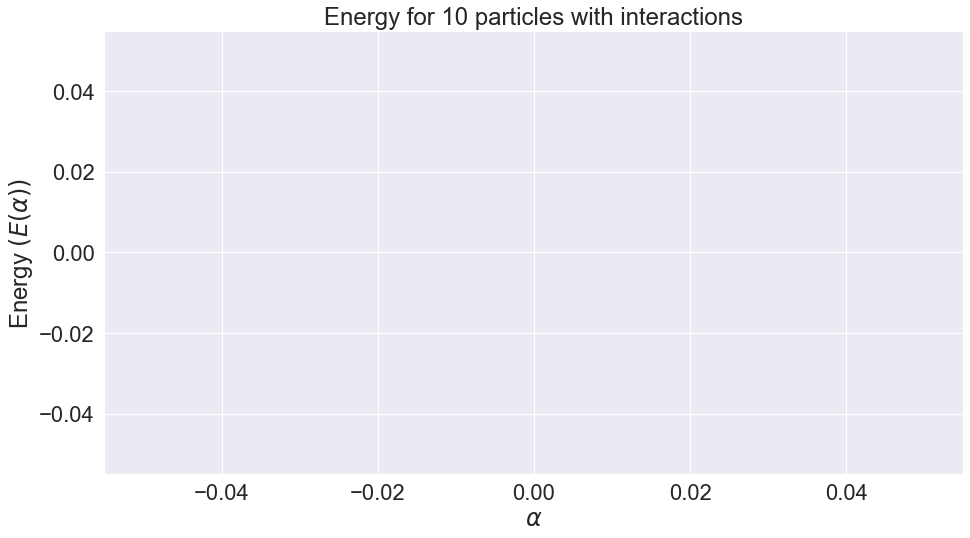

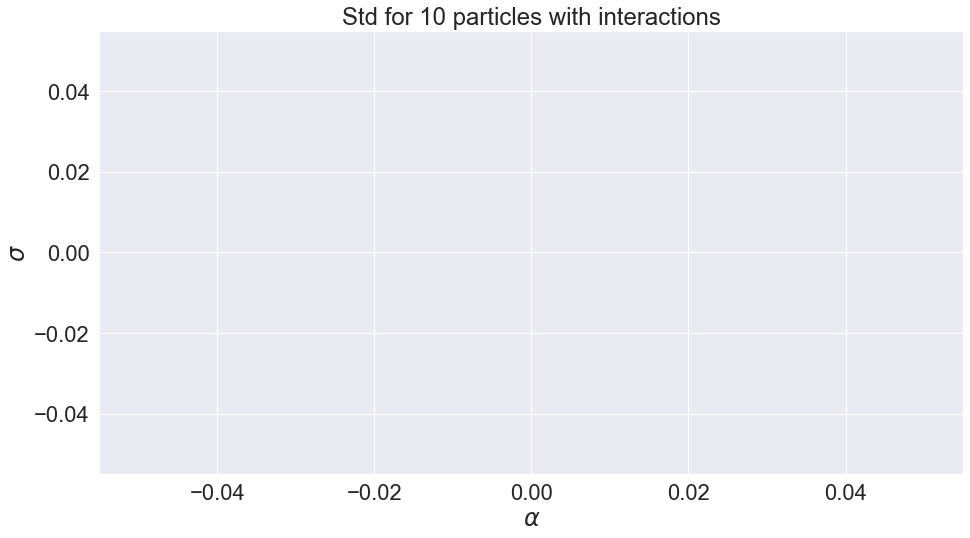

In [8]:
df = pd.read_csv(f'../output/N=10_d=3_int_IS.csv')
df['sigma'] = np.sqrt(df['variance'])
display(df)
flt = (df.energy < 100)
fig, axs = plt.subplots(1, 1, figsize = (14, 8))
axs.scatter(df[flt].alpha, df[flt].energy)
axs.plot(df[flt].alpha, df[flt].energy)
axs.set_xlabel(r'$\alpha$')
axs.set_ylabel(r'Energy $(E(\alpha))$')
axs.set_title(f'Energy for 10 particles with interactions')
fig.tight_layout()
plt.plot()
fig, axs = plt.subplots(1, 1, figsize = (14, 8))
axs.scatter(df[flt].alpha, df[flt].sigma)
axs.plot(df[flt].alpha, df[flt].sigma)
axs.set_xlabel(r'$\alpha$')
axs.set_ylabel(r'$\sigma$')
axs.set_title(f'Std for 10 particles with interactions')
fig.tight_layout()
plt.plot()

[]

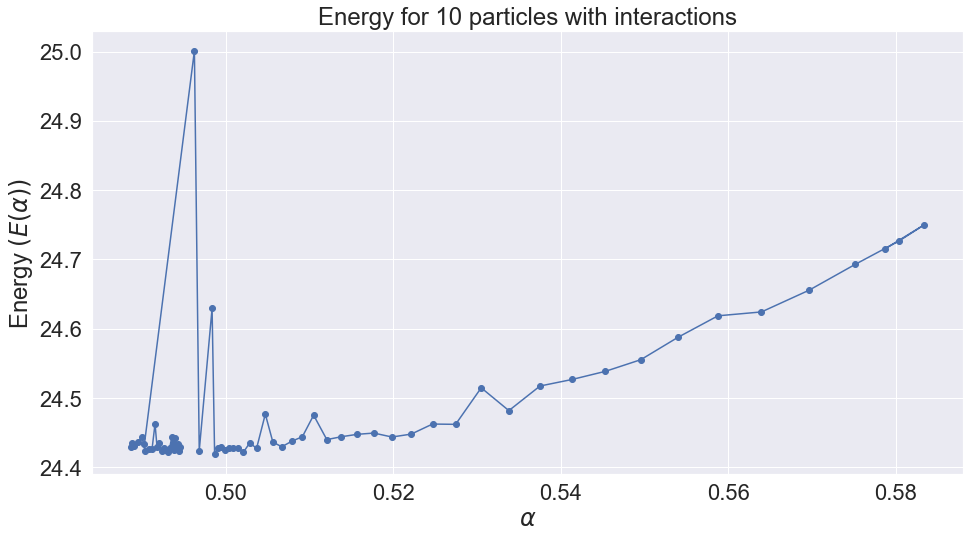

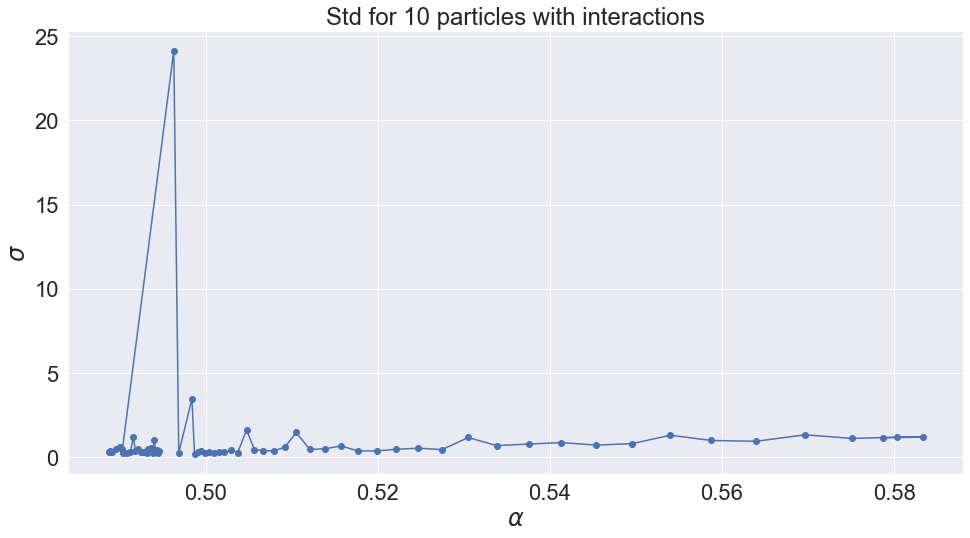

In [9]:
df = pd.read_csv(f'../output/N=10_d=3_GD_IS_energy.csv')
df['sigma'] = np.sqrt(df['variance'])
#display(df)
flt = (df.energy < 100)
fig, axs = plt.subplots(1, 1, figsize = (14, 8))
axs.plot(df[flt].alpha[3:], df[flt].energy[3:], marker = 'o')
#axs.plot(df[flt].alpha, df[flt].energy)
axs.set_xlabel(r'$\alpha$')
axs.set_ylabel(r'Energy $(E(\alpha))$')
axs.set_title(f'Energy for 10 particles with interactions')
fig.tight_layout()
plt.plot()


fig, axs = plt.subplots(1, 1, figsize = (14, 8))
axs.plot(df[flt].alpha[3:], df[flt].sigma[3:], marker = 'o')
axs.set_xlabel(r'$\alpha$')
axs.set_ylabel(r'$\sigma$')
axs.set_title(f'Std for 10 particles with interactions')
fig.tight_layout()
plt.plot()

In [10]:
df_density_inter = pd.read_csv('../output/density_1_100.csv', header = None, delim_whitespace=True)
df_density_inter['norm'] = np.linalg.norm(df_density_inter.iloc[:, 0:3], axis = 1)


df_density = pd.read_csv('../output/density_1_10.csv', header = None, delim_whitespace=True)
df_density['norm'] = np.linalg.norm(df_density.iloc[:, 0:3], axis = 1)

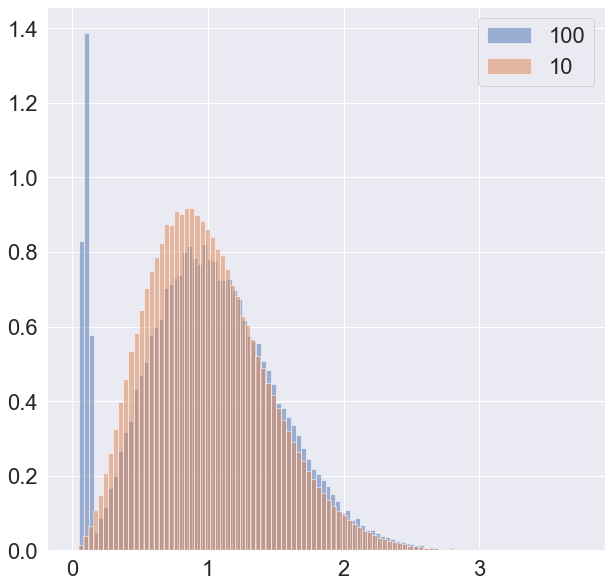

In [11]:
plt.figure(figsize=(10, 10))
plt.hist(df_density_inter.norm, bins = 100, density=True, alpha = 0.5, label = '100')
plt.hist(df_density.norm, bins = 100, density=True, alpha = 0.5, label = '10')
plt.legend()
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

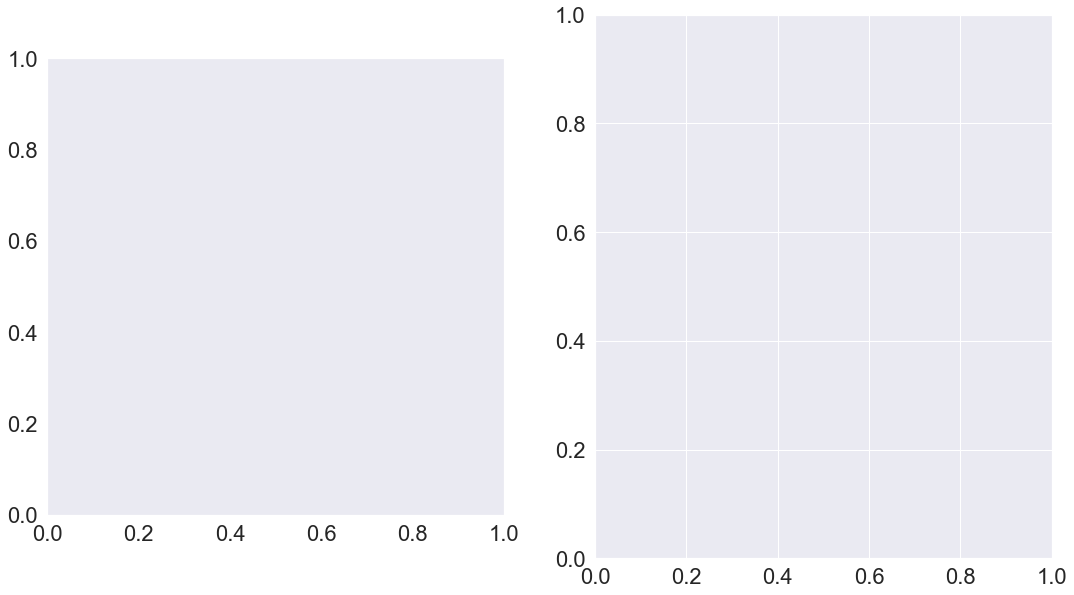

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(18, 10))
axs[0].grid(False)
axs[0].imshow(df_density_inter[0], df_density_inter[1])
axs[1].grid(False)
axs[1].imshow(df_density[0], df_density[1])
axs[0].set_title('100')
axs[1].set_title('10')
plt.colorbar()
plt.show()